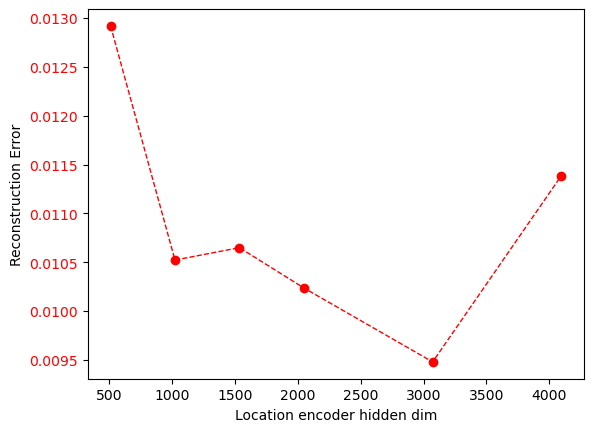

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1)

sizes = [512, 1024, 1536, 2048, 3072, 4096]
errors = [0.0129192229360342043,0.010522184893488884,0.010649462230503561,0.010237374342978,0.00947987753897905176,0.0113879935815930367]
f1s_col = "red"
ax.plot(sizes, errors, "--o", linewidth=1, color=f1s_col)
ax.tick_params(axis='y', labelcolor=f1s_col)
ax.set_xlabel('Location encoder hidden dim')
ax.set_ylabel('Reconstruction Error')

#plt.show()

plt.savefig("temp")

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
eco = gpd.read_file("/home/jdolli/chelsaCLIP/src/utils/test_cases/data/TerrestrialEcos/data/commondata/data0/wwf_terr_ecos.shp")
#eco = gpd.read_file("/home/jdolli/chelsaCLIP/src/utils/test_cases/data/Terrestrial_Ecoregions_of_the_World.zip")

In [10]:
import numpy as np
a = np.array([[1,2,3],[3,4,5]]).T
print(a.shape)
a = pd.DataFrame(a)
a.columns =  ['LON', 'LAT']
a

(3, 2)


,LON,LAT
0,1,3
1,2,4
2,3,5


In [27]:
import torch
a = torch.tensor([[1,2,3], [-1,-2,-1], [-2,2,1], [1,2,1]], dtype=torch.float)
torch.mm(a,a.T)

tensor([[14., -8.,  5.,  8.],
        [-8.,  6., -3., -6.],
        [ 5., -3.,  9.,  3.],
        [ 8., -6.,  3.,  6.]])

In [6]:
import torch
a = torch.tensor([0.1614, 0.5177, 0.2951])
print(a.mean(), a.std())

tensor(0.3247) tensor(0.1800)


In [15]:
import torch
loc_month_emb = torch.tensor([[1,2,3],[4,5,2.0]])
(loc_month_emb / loc_month_emb.norm(dim=1, keepdim=True))

tensor([[1.0000],
        [1.0000]])

In [30]:
norm = torch.norm(a, dim=1).view(-1,1)
torch.mm(norm, norm.T)

tensor([[14.0000,  9.1652, 11.2250,  9.1652],
        [ 9.1652,  6.0000,  7.3485,  6.0000],
        [11.2250,  7.3485,  9.0000,  7.3485],
        [ 9.1652,  6.0000,  7.3485,  6.0000]])

In [29]:
torch.mm(a,a.T)/torch.mm(norm, norm.T)

tensor([[ 1.0000, -0.8729,  0.4454,  0.8729],
        [-0.8729,  1.0000, -0.4082, -1.0000],
        [ 0.4454, -0.4082,  1.0000,  0.4082],
        [ 0.8729, -1.0000,  0.4082,  1.0000]])

In [3]:
import pandas as pd
import os

In [10]:
#os.path.exists()
path = "./test.csv"
#df = pd.from_csv(path)
df = pd.DataFrame({})
dataset = "Arctic"
model = "Seco-Eco"
metric = "Micro F1"
val = 0.033234
df.loc[model, " ".join([dataset, metric])] = val
print(df)
df.to_csv(path)

          Arctic Micro F1
Seco-Eco         0.033234
huh              0.033234


In [1]:
import numpy as np
ras = np.load("/shares/wegner.ics.uzh/CHELSA/Future_Climatologies/01_monthly_float16.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/shares/wegner.ics.uzh/CHELSA/Future_Climatologies/01_monthly_numpy.npy'

In [ ]:
print(ras.shape)
print(ras.mean(0,1,2,4))

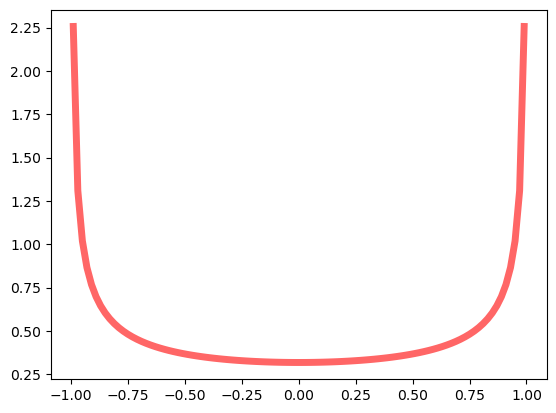

In [11]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(arcsine.ppf(0.01), arcsine.ppf(0.99), 100)
x = np.linspace(-0.99, 0.99, 100)

ax.plot(x, arcsine.pdf(x, -1, 2), 'r-', lw=5, alpha=0.6, label='arcsine pdf')
#ax.plot(x, x, 'r-', lw=5, alpha=0.6, label='arcsine pdf')
plt.show()

In [14]:
arcsine.pdf(-0.99, -1, 2)

2.256438956840317

In [30]:
import numpy as np
from scipy.stats import arcsine
import matplotlib.pyplot as plt
import math
r1 = arcsine.rvs(size=1000)
r2 = arcsine.rvs(size=1000)
"""a, b = (-1, 1)
r1 = np.random.uniform(a, b, 1000)
r1 = 1/ (np.pi * np.sqrt((r1-a) * (b-r1)))
r1"""

'a, b = (-1, 1)\nr1 = np.random.uniform(a, b, 1000)\nr1 = 1/ (np.pi * np.sqrt((r1-a) * (b-r1)))\nr1'

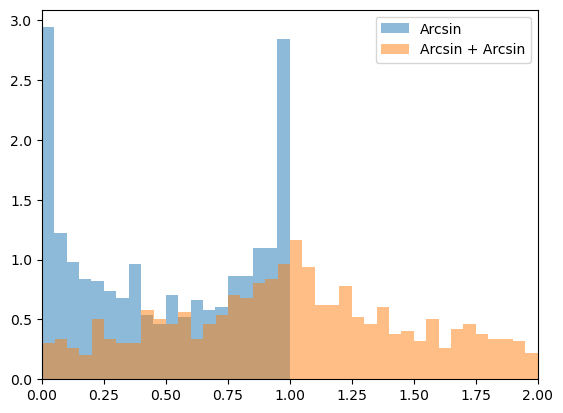

In [34]:
fig, ax = plt.subplots(1, 1)
ax.hist([r1[i] for i in range(len(r1))], density=True, bins=20, histtype='stepfilled', alpha=0.5, label="Arcsin")
ax.hist([r1[i]+r2[i] for i in range(len(r1))], density=True, bins=40, histtype='stepfilled', alpha=0.5, label="Arcsin + Arcsin")
ax.set_xlim(0, 2)
ax.legend()
plt.savefig("arcsin")
plt.show()

In [13]:
eco = gpd.read_file("/home/jdolli/chelsaCLIP/src/utils/test_cases/data/TerrestrialEcos/data/commondata/data0/wwf_terr_ecos.shp")


# Create point sample
#pts = pd.read_csv(".../random_points.csv",  header=None)
import rioxarray
from tqdm import tqdm
import numpy as np
from global_land_mask import globe
ras = rioxarray.open_rasterio('/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010/cmi/CHELSA_cmi_01_1981-2010_V.2.1.tif', cache=False)

lsm = np.array(ras)[0]<30000
land = np.where(lsm)
land = np.transpose(np.stack(land))

SAMPLES = 2
sample = np.random.choice(len(land), SAMPLES)
sample = land[sample]

data = np.zeros((len(sample), 2), dtype="float")
for i in tqdm(range(len(sample))):
    y, x = sample[i]
    loc = ras[0, y, x]
    data[i][0] = loc["x"] # Saving as lon/lat
    data[i][1] = loc["y"]
    if not globe.is_land(data[i][1], data[i][0]):
        print(str(data[i][0]) + "/" + str(data[i][1]))

pts = pd.DataFrame(data)

# Rename the columns of the CSV for clarity
pts.columns = ['LON', 'LAT']
print(pts)

100%|██████████| 2/2 [00:00<00:00, 962.00it/s]

         LON        LAT
0 -58.304306  52.079027
1 -42.529306  61.770694


In [24]:
pts.columns = ['LON', 'LAT']
# Convert the points to a GeoDataFrame
pts_gdf = gpd.GeoDataFrame(pts, geometry=gpd.points_from_xy(pts['LON'], pts['LAT'], crs="EPSG:4326"))
print(pts_gdf)
# Ensure both GeoDataFrames have the same CRS
print(pts_gdf.crs, eco.crs)
pts_gdf.to_crs(eco.crs, inplace=True)
print(pts_gdf.crs, eco.crs)
# Perform spatial join to extract information
ep_all = gpd.sjoin(pts_gdf, eco, how='left')
# Select the desired columns
ep = ep_all[['LON', 'LAT', 'ECO_NAME', 'BIOME', 'ECO_NUM', 'ECO_ID']]
print(ep)

         LON        LAT                    geometry
0 -58.304306  52.079027  POINT (-58.30431 52.07903)
1 -42.529306  61.770694  POINT (-42.52931 61.77069)
EPSG:4326 EPSG:3857
EPSG:3857 EPSG:3857
         LON        LAT                            ECO_NAME  BIOME  ECO_NUM  \
0 -58.304306  52.079027       Eastern Canadian Shield taiga    6.0      6.0   
1 -42.529306  61.770694  Kalaallit Nunaat low arctic tundra   11.0     13.0   

    ECO_ID  
0  50606.0  
1  51113.0  


In [37]:
pts = pd.read_csv('/home/jdolli/chelsaCLIP/src/utils/test_cases/data/ecobiomes_1000000.csv')
pts.head()

,Unnamed: 0,LON,LAT,ECO_NAME,BIOME,ECO_NUM,ECO_ID
0,0,-7.970973,71.045694,NaN,NaN,NaN,NaN
1,1,27.120694,48.337361,Central European mixed forests,4.0,12.0,80412.0
2,2,-61.145973,-29.970972,Espinal,8.0,1.0,60801.0
3,3,10.662360,16.995694,South Saharan steppe and woodlands,13.0,29.0,81329.0
4,4,99.620693,60.895694,East Siberian taiga,6.0,1.0,80601.0


In [55]:
pts["ECO_ID"][pts["ECO_ID"] == -9999] = 0

/sctmp/jdolli/ipykernel_3693423/1019438852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pts["ECO_ID"][pts["ECO_ID"] == -9999] = 0


In [43]:
pts.dropna()

,Unnamed: 0,LON,LAT,ECO_NAME,BIOME,ECO_NUM,ECO_ID
1,1,27.120694,48.337361,Central European mixed forests,4.0,12.0,80412.0
2,2,-61.145973,-29.970972,Espinal,8.0,1.0,60801.0
3,3,10.662360,16.995694,South Saharan steppe and woodlands,13.0,29.0,81329.0
4,4,99.620693,60.895694,East Siberian taiga,6.0,1.0,80601.0
5,5,-155.354306,60.354027,Interior Alaska-Yukon lowland taiga,6.0,7.0,50607.0
...,...,...,...,...,...,...,...
999995,999995,-92.795973,33.570694,Piney Woods forests,5.0,23.0,50523.0
999996,999996,35.337360,57.179027,Scandinavian and Russian taiga,6.0,8.0,80608.0
999997,999997,134.545693,61.870694,East Siberian taiga,6.0,1.0,80601.0
999998,999998,-67.387639,55.687361,Eastern Canadian Shield taiga,6.0,6.0,50606.0


In [1]:
# Test if Chelsaclip outputs are actually deterministic
import torch
import sys
sys.path.append('/home/jdolli/chelsaCLIP')
from src.models.components.loc_encoder import SirenNet
from src.utils.positional_encoding.spheregrid import SphereGridSpatialRelationEncoder

In [2]:
PATH = "/shares/wegner.ics.uzh/CHELSA/checkpoints/epoch_098-v5.ckpt" #naive tiny
state_dict = torch.load(PATH, weights_only=False)
location_encoder = SirenNet(dim_in=386, dim_hidden=512, dim_out=256, num_layers=2, dropout=False)
loc_enc_sd = {key[17:]:state_dict["state_dict"][key] for key in state_dict["state_dict"].keys() if key.startswith("location_encoder")}
location_encoder.load_state_dict(loc_enc_sd)
location_encoder.eval()
location_encoder = location_encoder
pos_embedding = SphereGridSpatialRelationEncoder(coord_dim=2, frequency_num=64, max_radius=360, min_radius=0.0003,
        freq_init="geometric", device="cpu")
#feats = get_feats(loc_ip, date_ip, months, location_encoder, pos_embedding, use_months=True, pass_months_to_forward=False)

In [13]:
loc = torch.Tensor([[8.0,47.0], [9.0,47.0]])
month = torch.Tensor([4.0,4.0])
loc = pos_embedding(loc.double()).squeeze(dim=1)
loc_month = torch.concat([loc, torch.sin(month/12*torch.pi*2).unsqueeze(dim=-1),torch.cos(month/12*torch.pi*2).unsqueeze(dim=-1)], dim=-1)
feats2 = location_encoder(loc_month).float().detach().cpu()

In [14]:
feats1

tensor([[-2.2065e+00,  2.8898e+00,  2.0945e-01, -1.7803e+00,  8.6297e-02,
          3.9128e+00,  1.7134e+00,  2.6472e+00, -6.0497e-01, -2.4132e+00,
          8.0964e+00,  2.6049e+00,  3.1618e+00, -5.4664e-01,  2.8112e-03,
         -1.3558e+00,  1.8897e+00,  1.8305e+00, -2.8903e+00,  2.5494e+00,
          9.6945e-01, -7.8608e+00,  2.1604e+00, -3.0159e-01, -6.6333e+00,
         -4.7607e-01,  9.5716e-01,  1.7194e+00, -1.4533e+00,  1.5701e+00,
          1.8251e+00, -2.0589e+00,  4.2440e-01, -1.8755e+00, -6.8799e-01,
         -7.2993e-01,  2.4427e+00,  1.2284e+00, -1.6795e-01,  1.5034e+00,
          8.9880e-01,  8.9077e-01, -3.5662e+00, -2.3181e-01, -2.3182e+00,
         -2.5620e-01, -3.2101e+00,  6.5069e+00, -5.3905e-01,  3.1758e+00,
          4.3355e+00,  6.9662e-01,  2.2319e+00, -1.7706e+00, -9.1601e-02,
         -7.2454e-01, -1.0861e+00,  7.4999e-01, -2.1344e+00, -1.9404e+00,
          7.2956e-02,  1.4118e+00,  5.8094e-01,  7.7212e-01,  4.2717e+00,
         -2.3055e+00, -9.5569e-01,  1.